In [84]:
import pandas as pd
import numpy as np

In [85]:
df = pd.read_csv('IMDB Dataset.csv', error_bad_lines=False)


<ipython-input-85-bd3660392bb5>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('IMDB Dataset.csv', error_bad_lines=False)


In [86]:
type(df)

pandas.core.frame.DataFrame

In [87]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [88]:
type(df)

pandas.core.frame.DataFrame

In [89]:
df.shape

(50000, 2)

In [90]:
df['review'].iloc[49999]


"No one expects the Star Trek movies to be high art, but the fans do expect a movie that is as good as some of the best episodes. Unfortunately, this movie had a muddled, implausible plot that just left me cringing - this is by far the worst of the nine (so far) movies. Even the chance to watch the well known characters interact in another movie can't save this movie - including the goofy scenes with Kirk, Spock and McCoy at Yosemite.<br /><br />I would say this movie is not worth a rental, and hardly worth watching, however for the True Fan who needs to see all the movies, renting this movie is about the only way you'll see it - even the cable channels avoid this movie."

#### will do Lemmatization , Word2Vec, AvgWord2Vec, then ML Algo

In [12]:
## Data cleaning and preprocessing
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [13]:
## important modules
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [19]:
type(df)


str

In [24]:
# import re
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# # Initialize the WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

corpus = []
for i in range(len(df)):
    # Remove all special characters except a-z and A-Z
    review = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    review = review.lower()  # Convert to lowercase
    review = review.split()  # Tokenize the text into words
    # Lemmatize each word and remove stopwords
    review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english')]
    # joining the processed words back into a string
    review = ' '.join(review)
    # append the preprocessed review to the corpus list
    corpus.append(review)


In [25]:
corpus

['one reviewer mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison exper

In [29]:
len(corpus)

50000

In [30]:
corpus[0]

'one reviewer mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experi

In [32]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
## words list of all the sentences
words=[]
for sent in corpus:
  sent_token=sent_tokenize(sent)
  for sent in sent_token:
    words.append(simple_preprocess(sent)) # lowering each and every word

In [35]:
# vocabulary
words

[['one',
  'reviewer',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'hooked',
  'right',
  'exactly',
  'happened',
  'br',
  'br',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scene',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'br',
  'br',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focus',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'many',
  'aryan',
  'muslim',
  'gangsta',
  'latino',
  'christian',
  'italian',
  'irish',
  'scuffle',
  'death',
  'stare',
  'dodgy',
  'dealing',
  'shady',
  'agreement',
  'never',
  'far',
  'away',

In [37]:
#all the unique words of the first review
words[0]

['one',
 'reviewer',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'br',
 'br',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'br',
 'br',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'away',
 'br',
 'br',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 

### Creating Word2Vec Model

In [39]:
import gensim
from gensim.models import Word2Vec
 #train word2vec from scratch
model=gensim.models.Word2Vec(words, window=5, min_count=2)

In [40]:
#all the vocabulary
model.wv.index_to_key

['br',
 'movie',
 'film',
 'one',
 'like',
 'time',
 'good',
 'character',
 'story',
 'even',
 'get',
 'would',
 'make',
 'see',
 'really',
 'scene',
 'well',
 'much',
 'bad',
 'people',
 'great',
 'also',
 'first',
 'show',
 'way',
 'thing',
 'made',
 'life',
 'could',
 'think',
 'go',
 'know',
 'watch',
 'love',
 'plot',
 'actor',
 'two',
 'many',
 'seen',
 'year',
 'say',
 'end',
 'never',
 'acting',
 'look',
 'best',
 'little',
 'ever',
 'man',
 'better',
 'take',
 'come',
 'work',
 'still',
 'part',
 'something',
 'director',
 'find',
 'want',
 'back',
 'give',
 'lot',
 'real',
 'guy',
 'watching',
 'performance',
 'woman',
 'play',
 'old',
 'funny',
 'though',
 'another',
 'actually',
 'nothing',
 'role',
 'going',
 'new',
 'every',
 'girl',
 'day',
 'world',
 'point',
 'cast',
 'horror',
 'minute',
 'comedy',
 'thought',
 'fact',
 'feel',
 'quite',
 'pretty',
 'star',
 'action',
 'around',
 'seems',
 'young',
 'big',
 'however',
 'got',
 'enough',
 'right',
 'long',
 'line',
 'f

In [41]:
#Total vacab count
model.corpus_count

50000

In [42]:
model.wv.similar_by_word('entirely')

[('completely', 0.7361840605735779),
 ('wholly', 0.641292154788971),
 ('altogether', 0.632529079914093),
 ('totally', 0.5965948700904846),
 ('structure', 0.5831067562103271),
 ('deliberately', 0.5736503601074219),
 ('partially', 0.5626986026763916),
 ('largely', 0.5572709441184998),
 ('merely', 0.54575514793396),
 ('context', 0.5437436103820801)]

In [43]:
model.wv['entirely'].shape

(100,)

### Now doing average Word2Vec

In [44]:
import numpy as np
def avg_word2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key], axis=0)


In [45]:
!pip install tqdm

In [46]:
from tqdm import tqdm


In [47]:
words[100]

['short',
 'film',
 'inspired',
 'soon',
 'full',
 'length',
 'feature',
 'spatula',
 'madness',
 'hilarious',
 'piece',
 'contends',
 'similar',
 'cartoon',
 'yielding',
 'multiple',
 'writer',
 'short',
 'film',
 'star',
 'edward',
 'spatula',
 'fired',
 'job',
 'join',
 'fight',
 'evil',
 'spoon',
 'premise',
 'allows',
 'funny',
 'content',
 'near',
 'beginning',
 'barely',
 'present',
 'remainder',
 'feature',
 'film',
 'minute',
 'running',
 'time',
 'absorbed',
 'odd',
 'ball',
 'comedy',
 'small',
 'musical',
 'number',
 'unfortunately',
 'much',
 'else',
 'lie',
 'plot',
 'set',
 'really',
 'time',
 'show',
 'surely',
 'follows',
 'plot',
 'better',
 'many',
 'high',
 'budget',
 'hollywood',
 'film',
 'film',
 'worth',
 'watching',
 'least',
 'time',
 'take',
 'expect',
 'deep',
 'story']

In [48]:
type(model.wv.index_to_key)

list

In [49]:
## apply for the all the  sentencs
x=[]
for i in tqdm(range(len(words))):
  x.append(avg_word2vec(words[i]))

100%|██████████| 50000/50000 [14:41<00:00, 56.71it/s]


In [50]:
type(x)

list

In [52]:
x_new=np.array(x)


In [55]:
# all the sentences is converted to 100 dimesnsion vector
len(x_new[0])

100

In [56]:
x_new

array([[-0.05934826,  0.05117581,  0.11338052, ..., -0.2157177 ,
        -0.12925804,  0.2710589 ],
       [-0.29135996, -0.4857537 ,  0.14561912, ..., -0.05949107,
        -0.09581448,  0.2098255 ],
       [ 0.1668918 , -0.09789663, -0.02973202, ...,  0.04470082,
        -0.07416181,  0.36522114],
       ...,
       [ 0.20554073,  0.24216339,  0.13110688, ..., -0.12594649,
        -0.07096391, -0.03601699],
       [ 0.00838741,  0.10468541,  0.03316415, ..., -0.10166699,
         0.01400835,  0.29125574],
       [-0.3163827 , -0.20012836, -0.365579  , ..., -0.5247453 ,
        -0.48388952,  0.3853759 ]], dtype=float32)

In [57]:
y=pd.get_dummies(df['sentiment'])

In [58]:
y

negative  positive
0             0         1
1             0         1
2             0         1
3             1         0
4             0         1
...         ...       ...
49995         0         1
49996         1         0
49997         1         0
49998         1         0
49999         1         0

[50000 rows x 2 columns]

In [59]:
y=y.iloc[: , 1 ].values

In [60]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [91]:
x, y

([array([-0.05934826,  0.05117581,  0.11338052, -0.23659386,  0.0314315 ,
         -0.6070121 ,  0.49381176,  0.52446496, -0.0149154 , -0.09842899,
         -0.16860743,  0.2778934 , -0.48171493, -0.03883692, -0.10518807,
         -0.36885768,  0.67380553,  0.01503753, -0.21902505, -0.609498  ,
          0.37650245,  0.31886917,  0.24280128, -0.10443445, -0.02953563,
          0.3521789 , -0.11138669,  0.15512598,  0.05431489,  0.37357092,
          0.17603002,  0.20016873,  0.16735342, -0.1490362 , -0.17398798,
          0.01233844,  0.38944304, -0.41832012,  0.08606171, -0.16282928,
          0.08954028, -0.1972154 ,  0.1923126 ,  0.5939544 ,  0.33117142,
         -0.33457512, -0.08731155,  0.28036436, -0.06359693,  0.04641543,
          0.10509068, -0.13740258,  0.19141409, -0.13718903, -0.12695874,
          0.04412339, -0.02519031,  0.11646275, -0.01834024,  0.31304073,
          0.11126561, -0.05646282,  0.17590925, -0.08096185,  0.18830554,
          0.39229125, -0.27020943,  0.

### Now do train test split and apply ML Algo

In [109]:
## Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_new, y, test_size=0.20, random_state=42)

In [110]:
# using Random forest
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [107]:
y_pred=classifier.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_test,y_pred)
print(score)
print(classification_report(y_test,y_pred))

0.834
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5035
           1       0.83      0.84      0.83      4965

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [69]:
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=uint8)

### Now doing hyperparameter tuning for Random forest Classifier

In [115]:
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [1, 2, 3, 5, 7, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ['gini', 'entropy']
}


In [117]:
# from sklearn.model_selection import RandomizedSearchCV
# rf=RandomForestClassifier()
# rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
#                                random_state=42,n_jobs=-1)
# ### fit the randomized model
# rf_randomcv.fit(x_train,y_train)

In [118]:
# rf_randomcv.best_params__
# best_random_grid=rf_randomcv.best_estimator_

## Now do the training using these best parameters

### Gradient Boostig

In [92]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(x_train, y_train)


In [97]:
y_pred=clf.predict(x_test)

In [98]:
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_test,y_pred)
print(score)
print(classification_report(y_test,y_pred))

0.8321
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      5035
           1       0.83      0.84      0.83      4965

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



### Adaboost Classifier

In [100]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0).fit(x_train, y_train)


In [103]:
y_pred=ada_model.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_test,y_pred)
print(score)
print(classification_report(y_test,y_pred))



0.827
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      5035
           1       0.82      0.83      0.83      4965

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [119]:
import matplotlib.pyplot as plt
# the predicted labels for the first 5 samples in x_test
y_pred = classifier.predict(x_test[:10])
#the corresponding real labels for the first 5 samples in y_test
y_real = y_test[:10]
data = {'Predicted': y_pred, 'Real': y_real}
df_predict = pd.DataFrame(data)
df_predict

Predicted  Real
0          0     1
1          1     1
2          0     0
3          1     1
4          0     0
5          1     1
6          1     1
7          0     1
8          0     0
9          0     0

#### plotting top 5 test data->predicted vs Real

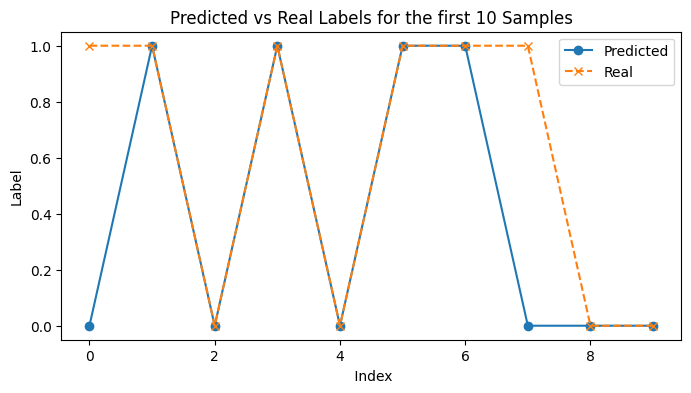

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
# plot the predicted labels
plt.plot(y_pred, label='Predicted', marker='o', linestyle='-')
# plot the real labels
plt.plot(y_real, label='Real', marker='x', linestyle='--')
# Adding labels and title
plt.xlabel(' Index')
plt.ylabel('Label')
plt.title('Predicted vs Real Labels for the first 10 Samples')
plt.legend()
plt.show()